In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.metrics import accuracy_score

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=';')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

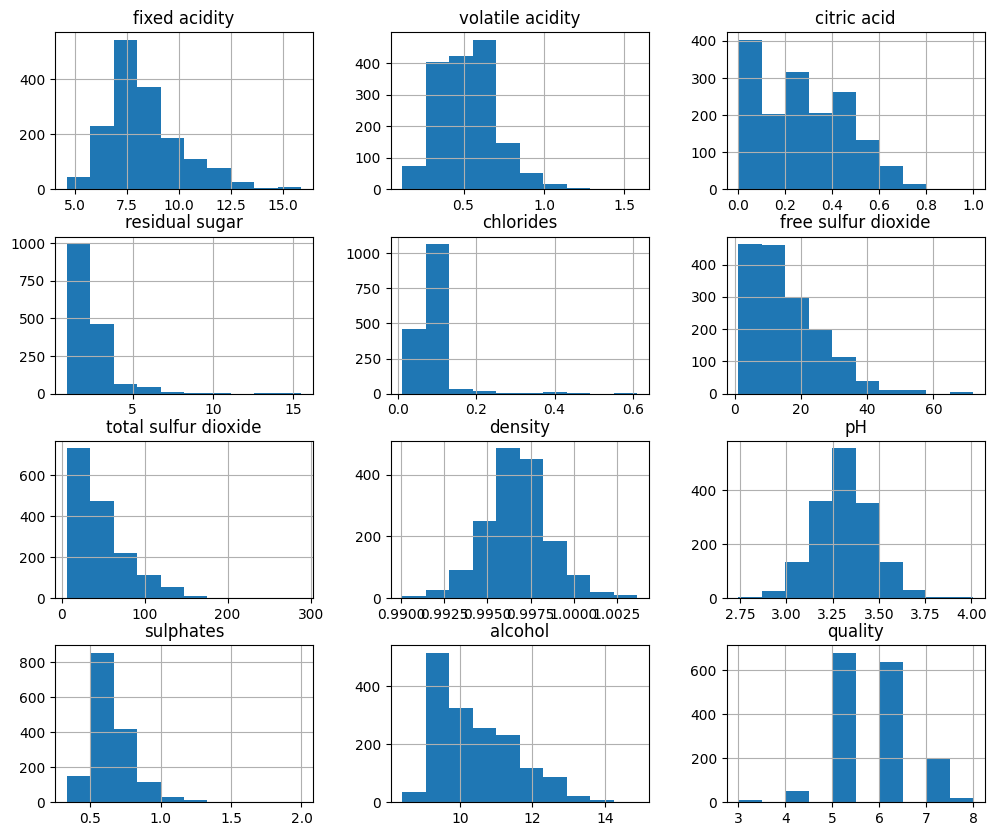

In [7]:
df.hist(figsize=(12,10))

In [8]:
numerical = df.select_dtypes(include=np.number).drop(columns=['target'],errors='ignore')
skews = numerical.apply(lambda x:skew(x.dropna()))
skewed_cols = skews[abs(skews) > 1].index.tolist()
print("Skewed Features",skewed_cols)

Skewed Features ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']


In [9]:
#skewed_cols.append('citric acid')
#skewed_cols.append('alcohol')
#skewed_cols.append('volatile acidity')
#skewed_cols.append('fixed acidity')
skewed_cols.extend(['citric acid','alcohol','volatile acidity','fixed acidity'])
skewed_cols

['residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates',
 'citric acid',
 'alcohol',
 'volatile acidity',
 'fixed acidity']

In [10]:
pt = PowerTransformer()
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

In [11]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.442666          0.995542    -1.531109       -0.597145  -0.172896   
1         -0.161308          1.771299    -1.531109        0.556565   0.786204   
2         -0.161308          1.269801    -1.255359        0.152372   0.560696   
3          1.522582         -1.550050     1.398471       -0.597145  -0.226113   
4         -0.442666          0.995542    -1.531109       -0.597145  -0.172896   
...             ...               ...          ...             ...        ...   
1594      -1.461202          0.497996    -0.993315       -0.380998   0.480036   
1595      -1.767458          0.227895    -0.867068       -0.008632  -1.013159   
1596      -1.364367          0.000387    -0.683294        0.152372  -0.172896   
1597      -1.767458          0.728553    -0.743826       -0.380998  -0.226113   
1598      -1.662640         -1.320459     1.031070        1.375435  -0.688299   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0               -0.268045             -0.124411  0.99780  3.51  -0.581650   
1                0.993852              0.854954  0.99680  3.20   0.395140   
2                0.193450              0.540394  0.99700  3.26   0.183772   
3                0.385115              0.693699  0.99800  3.16  -0.392318   
4               -0.268045             -0.124411  0.99780  3.51  -0.581650   
...                   ...                   ...      ...   ...        ...   
1594             1.397043              0.244351  0.99490  3.45  -0.392318   
1595             1.727353              0.457504  0.99512  3.52   0.874884   
1596             1.235044              0.107498  0.99574  3.42   0.820841   
1597             1.397043              0.244351  0.99547  3.57   0.588344   
1598             0.473632              0.177479  0.99549  3.39   0.256369   

       alcohol  quality  
0    -1.075025        5  
1    -0.500860        5  
2    -0.500860        5  
3    -0.500860        6  
4    -1.075025        5  
...        ...      ...  
1594  0.292864        5  
1595  0.888124        6  
1596  0.734557        6  
1597 -0.018800        5  
1598  0.734557        6  

[1599 rows x 12 columns]

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

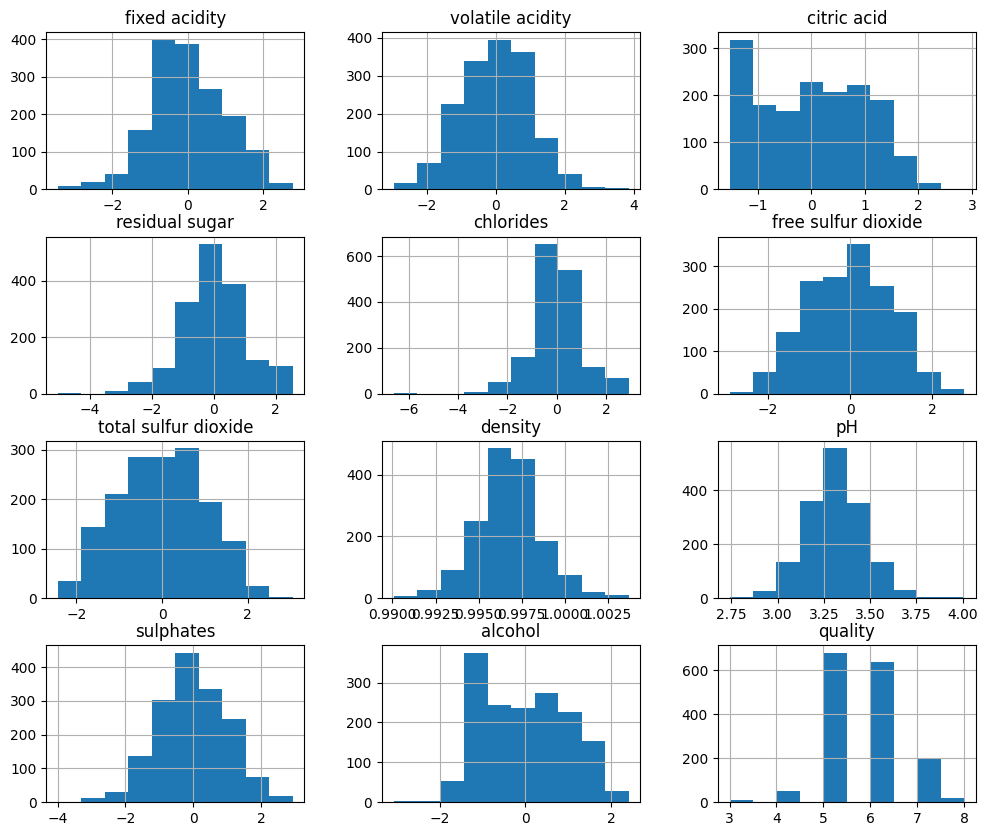

In [12]:
df.hist(figsize=(12,10))

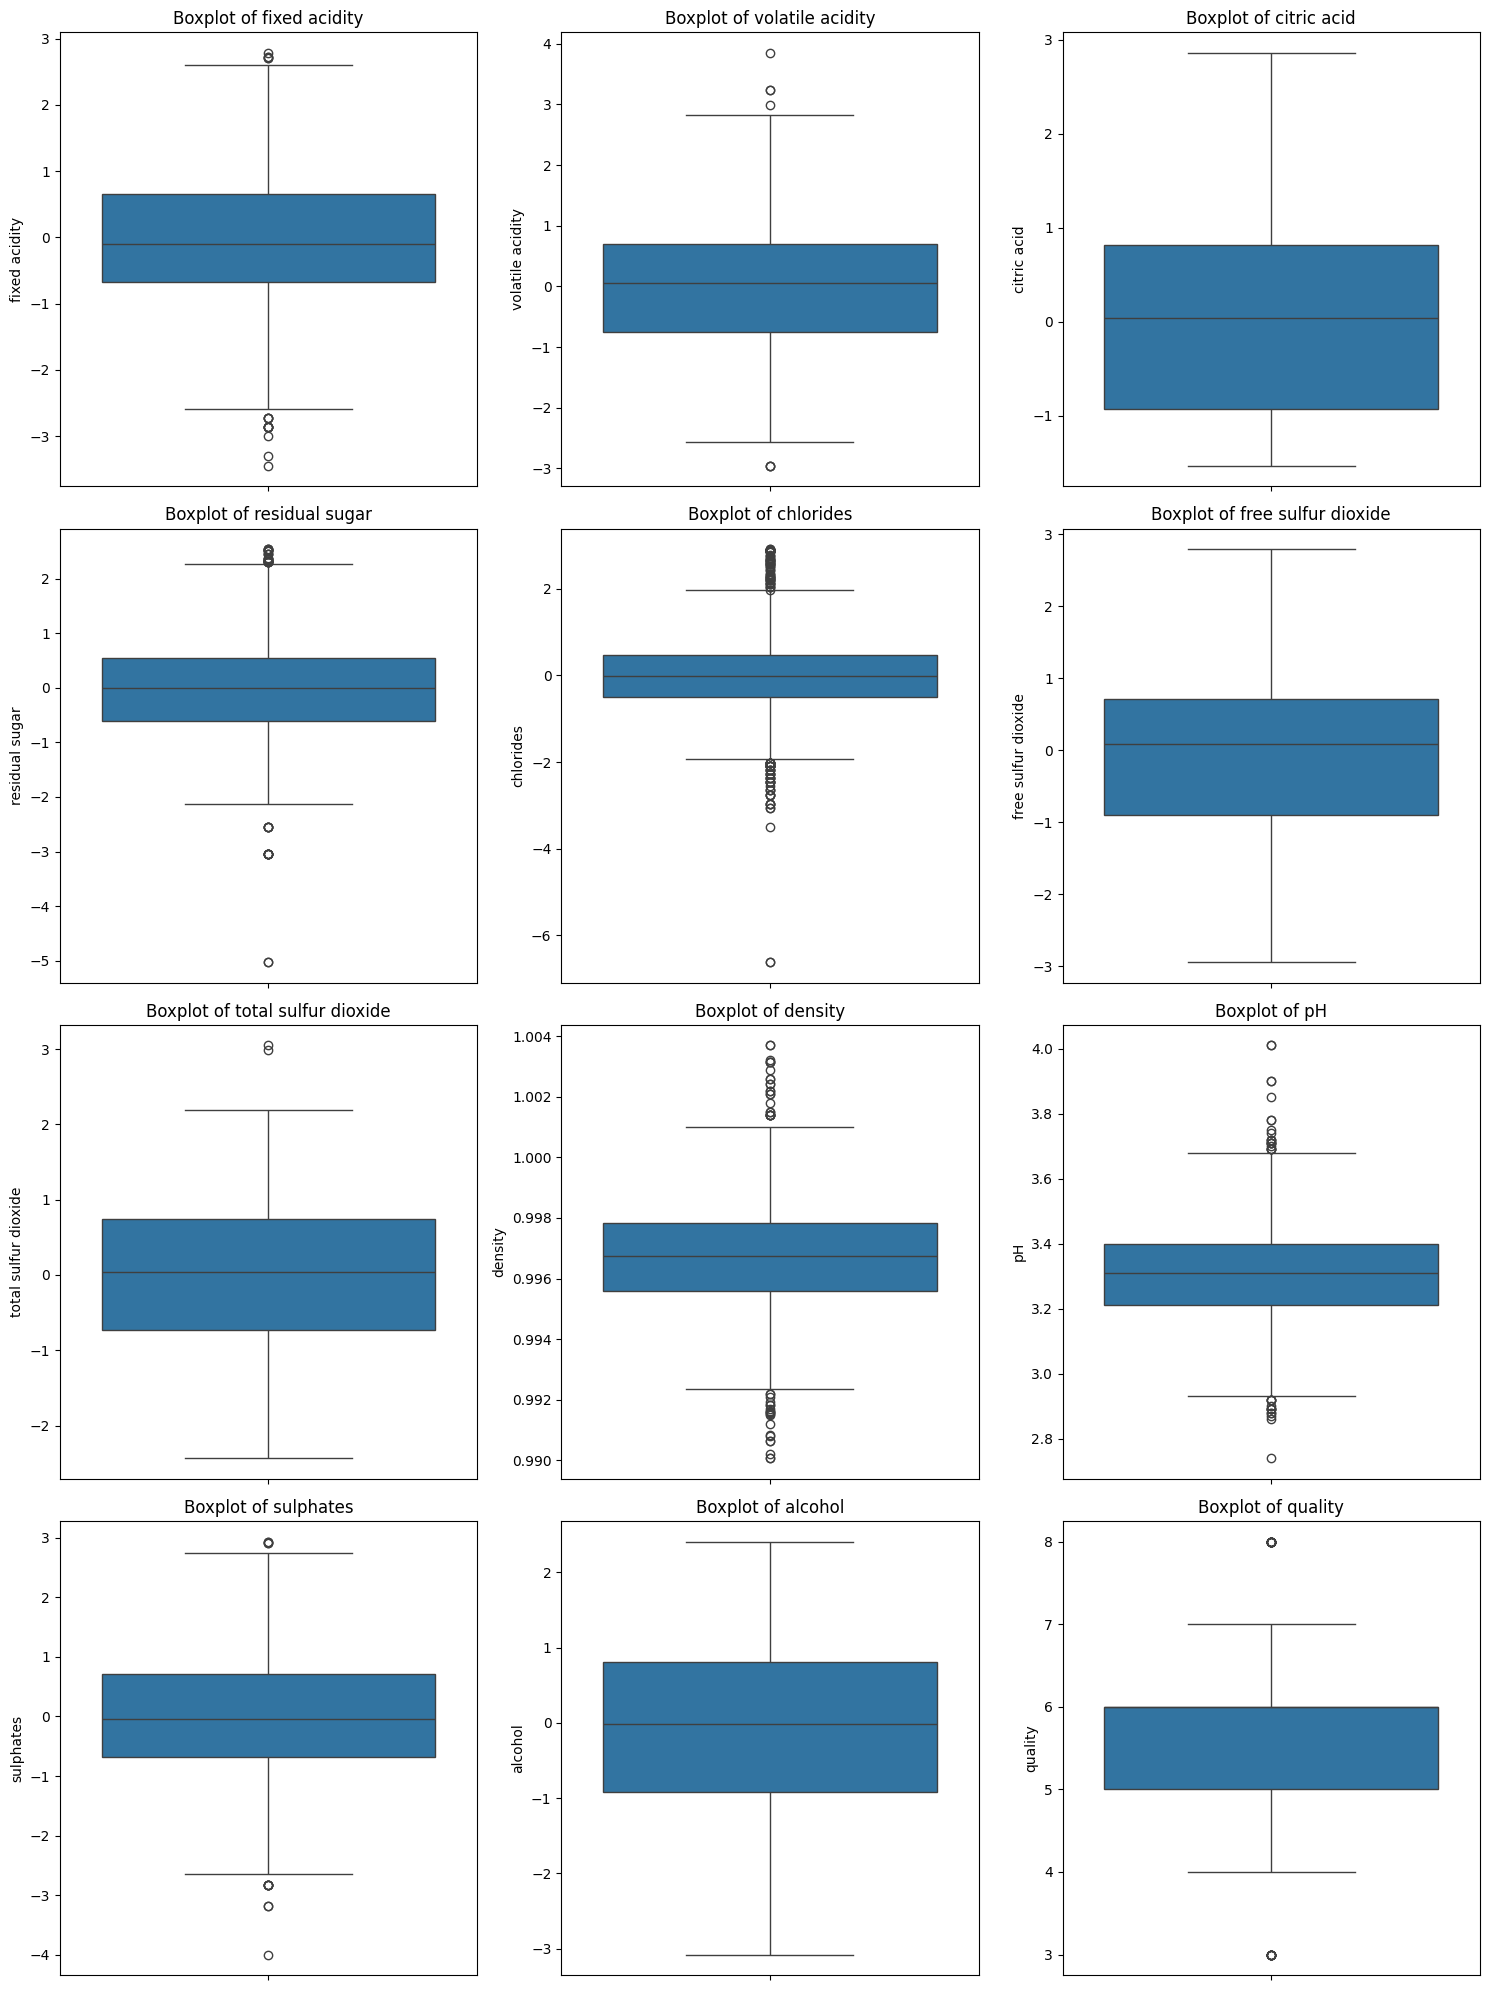

In [13]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows,num_cols,figsize=(15,num_rows * 5))
axes = axes.flatten()
for i,col in enumerate(df.columns):
    sns.boxplot(y=df[col],ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1,len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [14]:
corr_matrix = df.corr(method='pearson')
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.467616
sulphates               0.345841
citric acid             0.223351
fixed acidity           0.104976
residual sugar          0.030091
free sulfur dioxide    -0.050616
pH                     -0.057731
total sulfur dioxide   -0.172276
density                -0.174919
chlorides              -0.193982
volatile acidity       -0.393870
Name: quality, dtype: float64

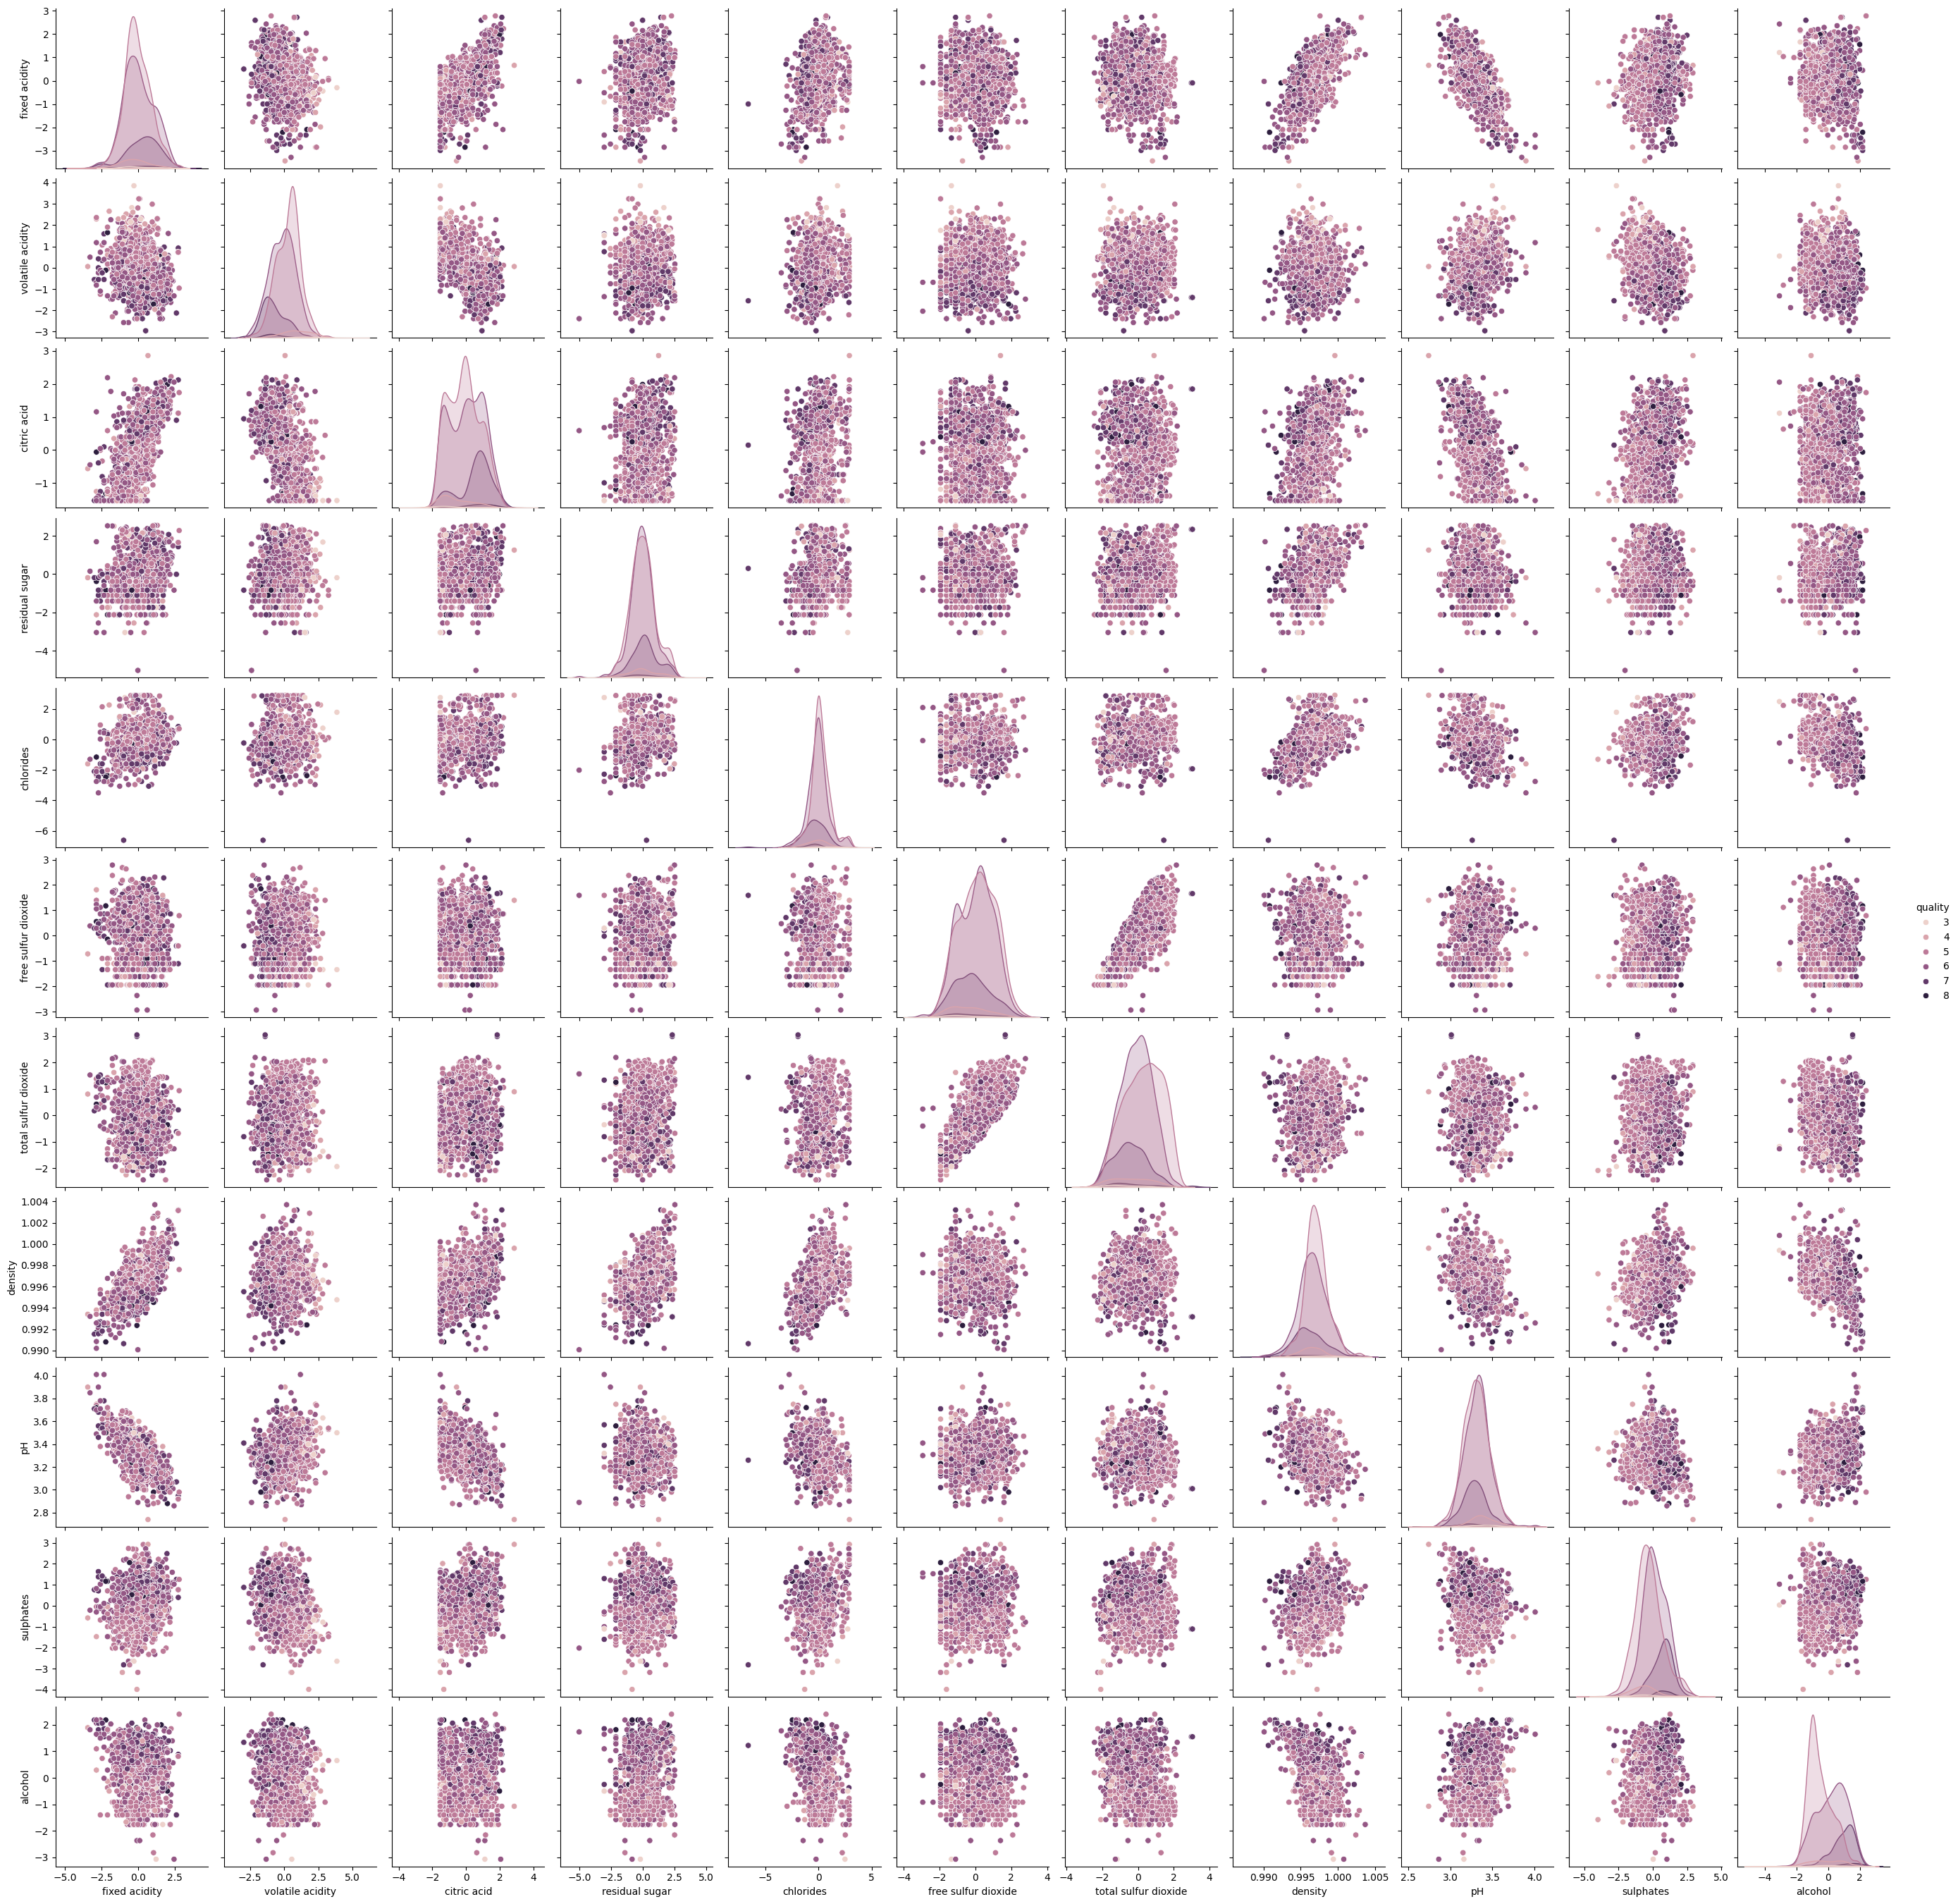

In [15]:
sns.pairplot(df,hue='quality')

In [16]:
X = df.drop('quality',axis=1)
y = df['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    stratify=y,
    random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)